# K-Nearest Neighbors(K-NN)

## Importing the libraries

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
#Reading a csv file
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
#Dimension of the data
df.shape

(400, 5)

In [4]:
#First 10 rows of the data
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [5]:
#Data types of all columns
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
#Checking for a missing values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
#Segragating Independent and Dependent variable
X = df.drop(['User ID', 'Purchased', 'Gender'], axis=1)
y = df['Purchased']

## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=42, shuffle=y)

## Implementing KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
#Creating an instance of KNN
knn = KNeighborsClassifier()

In [12]:
#Fit the model to the train data
knn.fit(X, y)

KNeighborsClassifier()

## Predicting the test result

In [13]:
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
      dtype=int64)

## Evaluating the model

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [15]:
#Confusion matrix
confusion_matrix(y_pred, y_test)

array([[13,  0],
       [ 1,  6]], dtype=int64)

In [16]:
#Accuracy score
accuracy_score(y_pred, y_test) * 100

95.0

## Visualizing the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


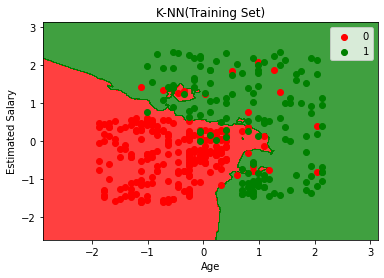

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN(Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualizing the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


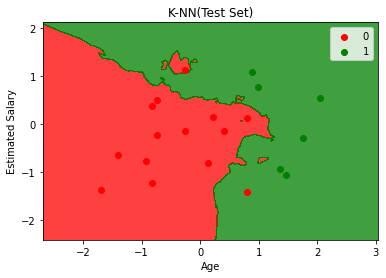

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN(Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()